In [19]:
import scanpy as sc

In [20]:
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/lustre/project/Stat/s1155202250/fastfolder/code/st/MultiGATE/MultiGATEgithub0607/tutorial_notebooks')
import MultiGATE 

In [21]:
rna_file = '/lustre/project/Stat/s1155202250/fastfolder/code/st/MultiGATE/MultiGATEgithub0607/MultiGATE/Reproduce/clustering/Simulated_data/output0311/simulated_data_adata1.h5ad'
atac_file = '/lustre/project/Stat/s1155202250/fastfolder/code/st/MultiGATE/MultiGATEgithub0607/MultiGATE/Reproduce/clustering/Simulated_data/output0311/simulated_data_adata2.h5ad'

# load adata1 and adata2
adata1 = sc.read_h5ad(rna_file)
adata2 = sc.read_h5ad(atac_file)


In [22]:
adata1

AnnData object with n_obs × n_vars = 2513 × 3000
    obs: 'barcode', 'major_celltype', 'true_label'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'Spatial_Net', 'gene_peak_Net'
    obsm: 'MultiGATE', 'MultiGATE_clip_all', 'spatial'

In [23]:
adata2

AnnData object with n_obs × n_vars = 2513 × 28270
    obs: 'barcode', 'major_celltype', 'true_label'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'chrom', 'chromStart', 'chromEnd'
    uns: 'Spatial_Net', 'gene_peak_Net'
    obsm: 'MultiGATE', 'MultiGATE_clip_all', 'spatial'

In [24]:
adata1,adata2=MultiGATE.wnn_R(adata1,adata2,res=0.5)

R[write to console]: Warning:
R[write to console]:  Feature names cannot have underscores ('_'), replacing with dashes ('-')

R[write to console]: Warning:
R[write to console]:  Feature names cannot have underscores ('_'), replacing with dashes ('-')

R[write to console]: Calculating cell-specific modality weights

R[write to console]: Finding 20 nearest neighbors for each modality.



  |                                                  | 0 % ~calculating   |+++++++++++++++++++++++++                         | 50% ~01s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=01s  


R[write to console]: Calculating kernel bandwidths



  |                                                  | 0 % ~calculating   |+++++++++++++++++++++++++                         | 50% ~00s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=00s  


R[write to console]: Finding multimodal neighbors



  |                                                  | 0 % ~calculating   |+++++++++++++++++++++++++                         | 50% ~02s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=03s  
  |                                                  | 0 % ~calculating   |+++++++++++++++++++++++++                         | 50% ~00s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=00s  


R[write to console]: Constructing multimodal KNN graph

R[write to console]: Constructing multimodal SNN graph

R[write to console]: 19:18:37 UMAP embedding parameters a = 0.9922 b = 1.112

R[write to console]: 19:18:37 Commencing smooth kNN distance calibration using 1 thread

R[write to console]: 19:18:37 Initializing from normalized Laplacian + noise

R[write to console]: 19:18:37 Commencing optimization for 500 epochs, with 74012 positive edges

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[wr

In [25]:
adata1.obs['wnn']

AAACAAGTATCTCCCA    2
AAACACCAATAACTGC    3
AAACAGAGCGACTCCT    3
AAACAGCTTTCAGAAG    1
AAACAGGGTCTATATT    1
                   ..
TTGTTCAGTGTGCTAC    1
TTGTTGTGTGTCAAGA    1
TTGTTTCACATCCAGG    3
TTGTTTCATTAGTCTA    1
TTGTTTCCATACAACT    1
Name: wnn, Length: 2513, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]

In [26]:

MultiGATE_cluster = adata1.obs['wnn']

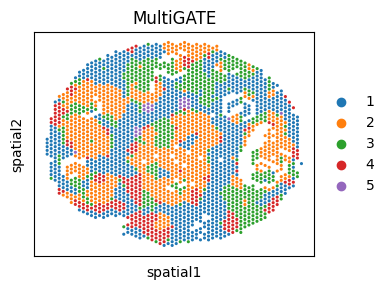

In [27]:
size=20
plt.rcParams["figure.figsize"] = (4, 3) 

sc.pl.embedding(adata1, basis='spatial', color='wnn',  title='MultiGATE', s=size, show=False,)

plt.tight_layout()
plt.show()